                  

             Assignment No 4 - Simple Linear Regression - Question no 2   

             Salary_hike -> Build a prediction model for Salary_hike

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [2]:
data = pd.read_csv("Salary_Data.csv")
data

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [3]:
data.shape

(30, 2)

                         EDA & Data Visualization

In [4]:
data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [5]:
data.info()           #NO Missing Values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


C:\Users\Gujar\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='YearsExperience', ylabel='Density'>

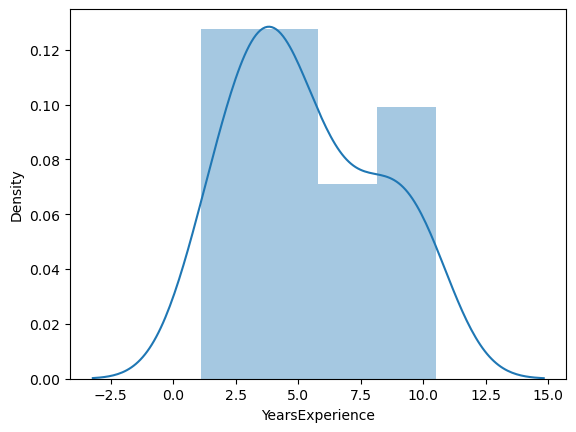

In [6]:
sns.distplot(data['YearsExperience'])

C:\Users\Gujar\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Salary', ylabel='Density'>

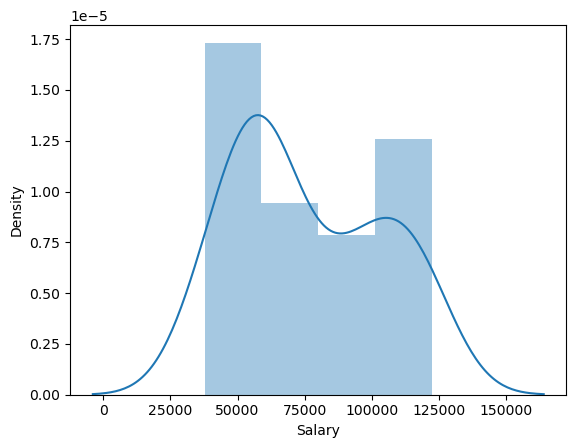

In [7]:
sns.distplot(data['Salary'])

In [8]:
#Renaming the columns
data=data.rename({'YearsExperience':'experience', 'Salary':'salary'},axis=1)
data

,experience,salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [9]:
#Print duplicates
data[data.duplicated()]   #No duplicates in the data.

,experience,salary


In [10]:
#Lets Check outliers in the data
Y = data['salary']
Y

0      39343.0
1      46205.0
2      37731.0
3      43525.0
4      39891.0
5      56642.0
6      60150.0
7      54445.0
8      64445.0
9      57189.0
10     63218.0
11     55794.0
12     56957.0
13     57081.0
14     61111.0
15     67938.0
16     66029.0
17     83088.0
18     81363.0
19     93940.0
20     91738.0
21     98273.0
22    101302.0
23    113812.0
24    109431.0
25    105582.0
26    116969.0
27    112635.0
28    122391.0
29    121872.0
Name: salary, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x1e39d3b5dc0>,
 'caps': [<matplotlib.lines.Line2D at 0x1e39d3c73a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e39d3b5af0>],
 'medians': [<matplotlib.lines.Line2D at 0x1e39d3c7940>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e39d3c7c10>],
 'means': []}

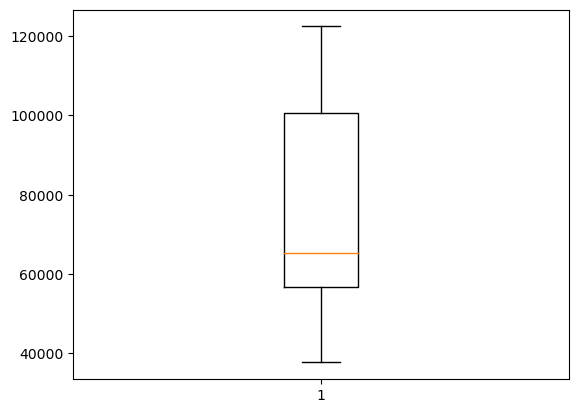

In [11]:
#visualization
plt.boxplot(Y)  #No Outliers in column "salary"

In [12]:
X = data["experience"]
X

0      1.1
1      1.3
2      1.5
3      2.0
4      2.2
5      2.9
6      3.0
7      3.2
8      3.2
9      3.7
10     3.9
11     4.0
12     4.0
13     4.1
14     4.5
15     4.9
16     5.1
17     5.3
18     5.9
19     6.0
20     6.8
21     7.1
22     7.9
23     8.2
24     8.7
25     9.0
26     9.5
27     9.6
28    10.3
29    10.5
Name: experience, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x1e39d425670>,
 'caps': [<matplotlib.lines.Line2D at 0x1e39d425c10>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e39d4253a0>],
 'medians': [<matplotlib.lines.Line2D at 0x1e39d4311f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e39d4314c0>],
 'means': []}

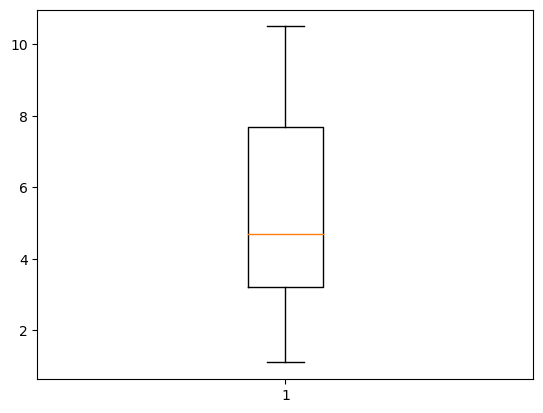

In [13]:
plt.boxplot(X)  #No Outliers in column "experience "

                 Correlation Analysis

In [14]:
data.corr()  #Good correlation between target & independent column as its close to value 1.

,experience,salary
experience,1.000000,0.978242
salary,0.978242,1.000000


C:\Users\Gujar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='experience', ylabel='salary'>

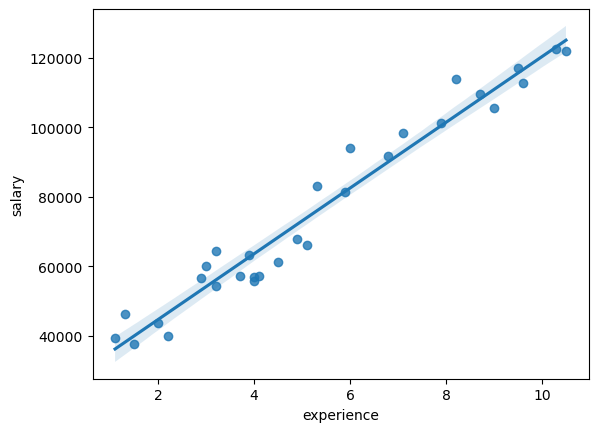

In [15]:
sns.regplot(X,Y)

                    Model Building

 First Model - Ordinary Least Square (Y ~ X)

In [16]:
model1 = smf.ols("salary ~ experience", data=data).fit()

In [17]:
model1.params     #B0 + B1X , B0 = 25792.20 , B1 = 9449.96

Intercept     25792.200199
experience     9449.962321
dtype: float64

In [18]:
prediction1= model1.predict(X)
prediction1

0      36187.158752
1      38077.151217
2      39967.143681
3      44692.124842
4      46582.117306
5      53197.090931
6      54142.087163
7      56032.079627
8      56032.079627
9      60757.060788
10     62647.053252
11     63592.049484
12     63592.049484
13     64537.045717
14     68317.030645
15     72097.015574
16     73987.008038
17     75877.000502
18     81546.977895
19     82491.974127
20     90051.943985
21     92886.932681
22    100446.902538
23    103281.891235
24    108006.872395
25    110841.861092
26    115566.842252
27    116511.838485
28    123126.812110
29    125016.804574
dtype: float64

In [19]:
r2_score(Y,prediction1)

0.9569566641435086

Second Model - Linear Regression

In [21]:
LR = LinearRegression()
X = data['experience'].values.reshape(30,1)
Y = data['salary'].values.reshape(30,1)
model2 = LR.fit(X,Y)

In [22]:
model2.intercept_ #B0

array([25792.20019867])

In [23]:
model2.coef_  #B1

array([[9449.96232146]])

In [24]:
prediction2= model2.predict(X)
r2_score(Y,prediction2)

0.9569566641435086

Third Model - Square Root transformation on data

In [42]:
model3 = smf.ols('np.sqrt(salary)~np.sqrt(experience)', data = data).fit()

In [43]:
model3.params

Intercept              103.568031
np.sqrt(experience)     75.626932
dtype: float64

In [44]:
model3.tvalues

Intercept              12.663496
np.sqrt(experience)    21.315126
dtype: float64

In [45]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        np.sqrt(salary)   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     454.3
Date:                Mon, 17 Jul 2023   Prob (F-statistic):           7.58e-19
Time:                        20:18:17   Log-Likelihood:                -116.52
No. Observations:                  30   AIC:                             237.0
Df Residuals:                      28   BIC:                             239.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept             103.5680      8.178     12.663      0.000      86.815     120.321
np.sqrt(experience)    75.6269      3.548     21.315      0.000      68.359      82.895
==============================================================================
Omnibus:                        0.924   Durbin-Watson:                   1.362
Prob(Omnibus):                  0.630   Jarque-Bera (JB):                0.801
Skew:                           0.087   Prob(JB):                        0.670
Kurtosis:                       2.219   Cond. No.                         9.97
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Fourth Model : Cuberoot transformation on Data

In [57]:
model4 = smf.ols('np.cbrt(salary)~np.cbrt(experience)', data = data).fit()


In [56]:
model4.params

Intercept              16.660277
np.cbrt(experience)    14.896252
dtype: float64

In [58]:
model4.tvalues

Intercept              12.811402
np.cbrt(experience)    19.658772
dtype: float64

In [59]:
model4.pvalues

Intercept              3.133760e-13
np.cbrt(experience)    6.367642e-18
dtype: float64

In [60]:
model4.rsquared

0.9324434036761005

                          Interpretation

In [55]:
from sklearn.metrics import r2_score

print("R2-score of Model 1:", r2_score(data['salary'], prediction1))
print("R2-score of Model 2:", r2_score(data['salary'], prediction2))
print("R2-score of Model 3:", model3.rsquared)
print("R2-score of Model 4:", model4.rsquared)


R2-score of Model 1: 0.9569566641435086
R2-score of Model 2: 0.9569566641435086
R2-score of Model 3: 0.9419490138976825
R2-score of Model 4: 0.9324434036761005


                    Model Prediction on New Data

In [61]:
new_data=pd.Series([3,5])
new_data

0    3
1    5
dtype: int64

In [62]:
data_pred=pd.DataFrame(new_data,columns=['experience'])
data_pred

,experience
0,3
1,5


In [63]:
model1.predict(data_pred)

0    54142.087163
1    73042.011806
dtype: float64

                     Interpretation

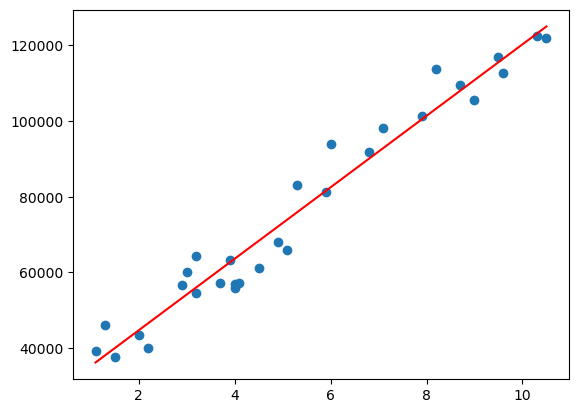

In [64]:

plt.scatter(data['experience'],data['salary'])
plt.plot(data['experience'], prediction1, color ='red')


Y = B0 + B1X , B0 = 25792.20 , B1 = 9449.96
So interpretation will be if X increases in number then Y will also increased by B1.
There is positive correlation between two independent variable.
          
